In [1]:
import pandas as pd  # Data Manipulation
import numpy as np   # Mathematical Calculations
import matplotlib.pyplot as plt   # Basic Visualizations
import seaborn as sns    # Advanced visualizations

In [2]:
df = "/content/laptop.csv"
df = pd.read_csv(df)

In [3]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
# Replace "?" with np.nan
df = df.replace('?', np.nan)

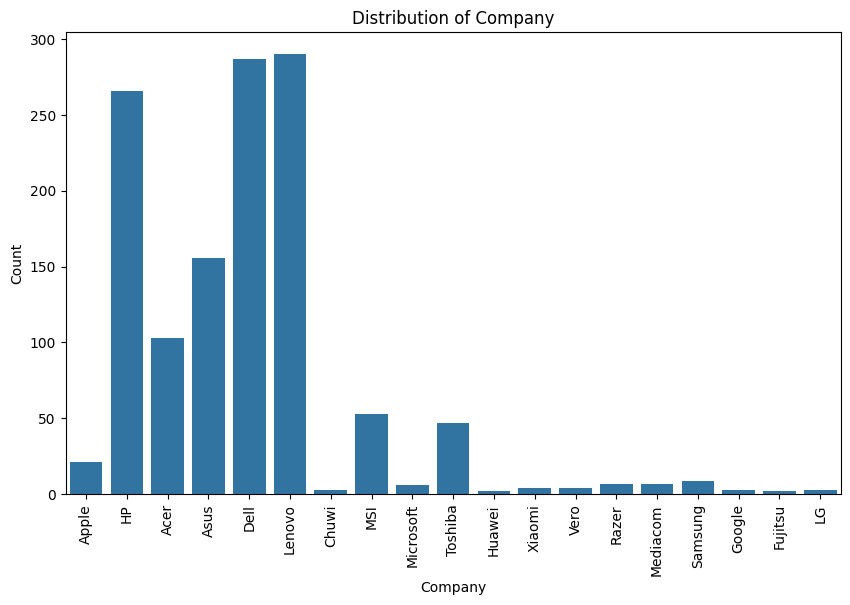

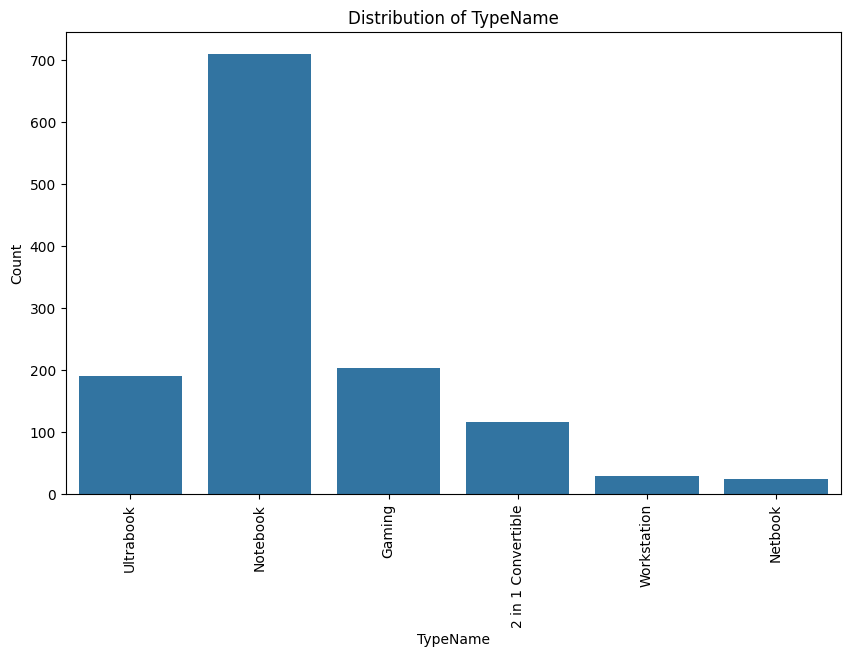

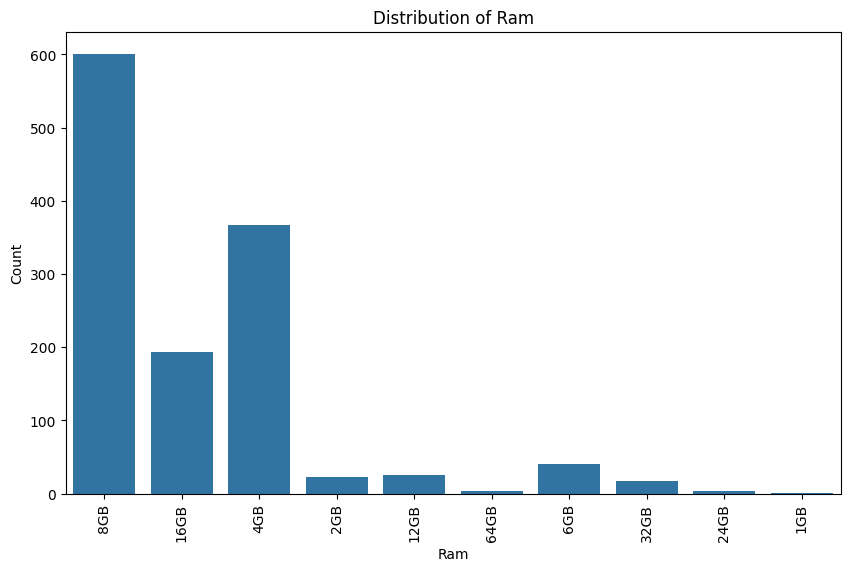

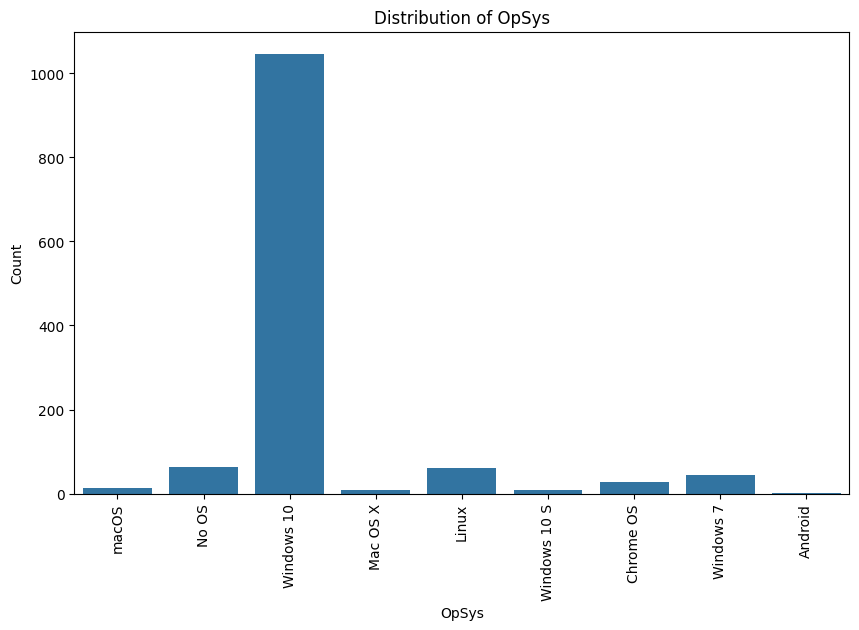

In [5]:
# Distribution of categorical variables
categorical_cols = ['Company', 'TypeName','Ram','OpSys']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.show()

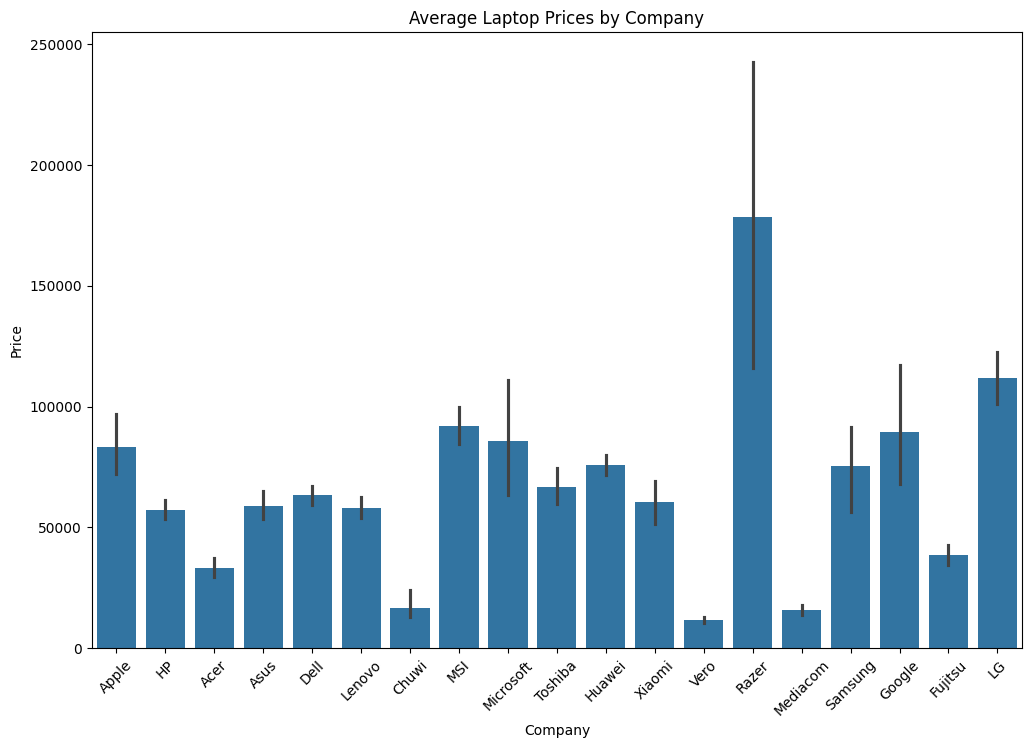

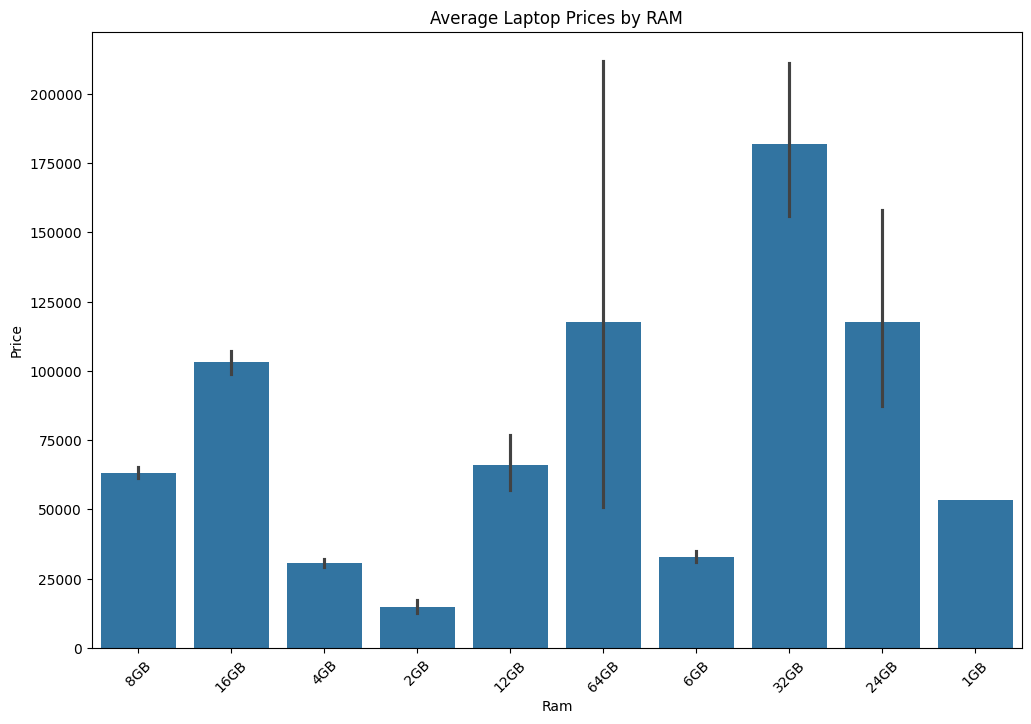

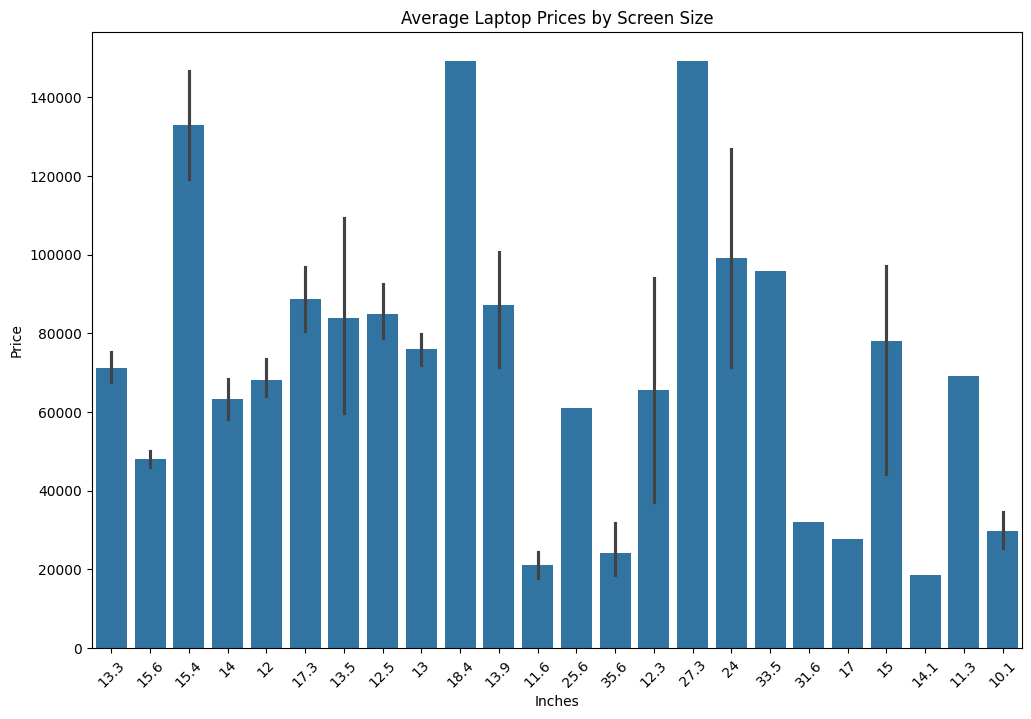

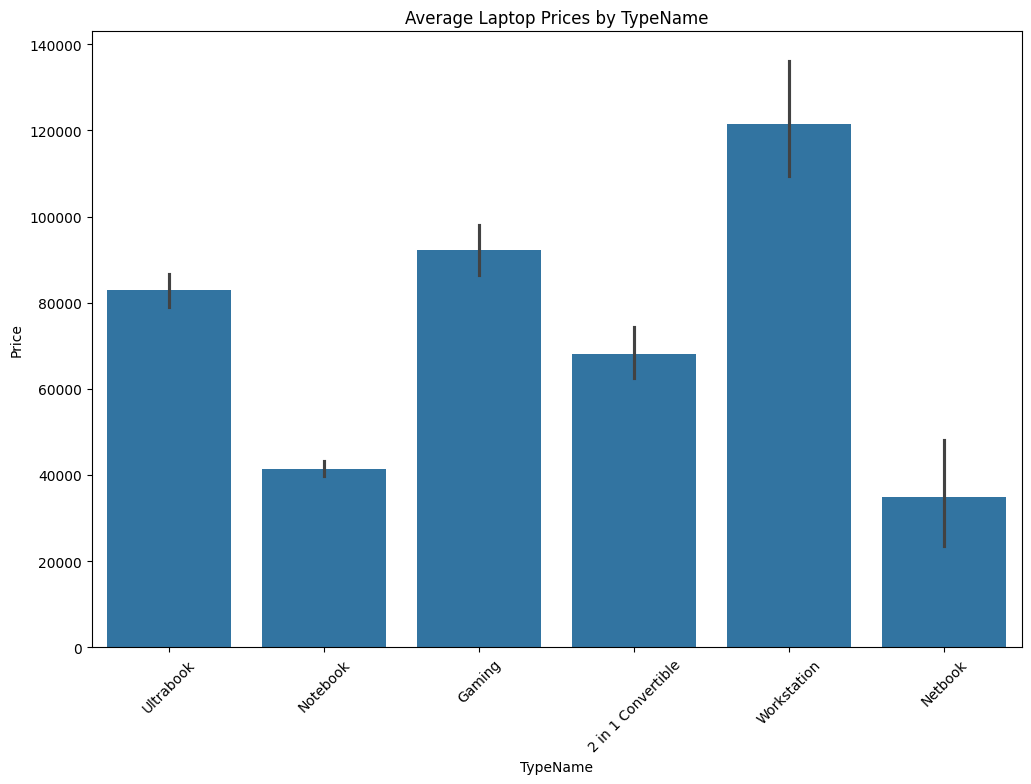

In [6]:
# Calculate the average price of laptops within each category
average_price_by_company = df.groupby('Company')['Price'].mean().reset_index()
average_price_by_ram = df.groupby('Ram')['Price'].mean().reset_index()
average_price_by_inches = df.groupby('Inches')['Price'].mean().reset_index()
average_price_by_inches = df.groupby('TypeName')['Price'].mean().reset_index()

# Plot bar plots
plt.figure(figsize=(12, 8))
sns.barplot(x='Company', y='Price', data=df, estimator=lambda x: sum(x) / len(x))
plt.title('Average Laptop Prices by Company')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Ram', y='Price', data=df, estimator=lambda x: sum(x) / len(x))
plt.title('Average Laptop Prices by RAM')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Inches', y='Price', data=df, estimator=lambda x: sum(x) / len(x))
plt.title('Average Laptop Prices by Screen Size')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='TypeName', y='Price', data=df, estimator=lambda x: sum(x) / len(x))
plt.title('Average Laptop Prices by TypeName')
plt.xticks(rotation=45)
plt.show()


# Checking null values

In [7]:
df.isnull().sum()

,0
Company,30
TypeName,30
Inches,31
ScreenResolution,30
Cpu,30
Ram,30
Memory,31
Gpu,30
OpSys,30
Weight,31


# Dropped null values and checking after imputation

In [8]:
df.dropna(inplace=True)
print(df.isnull().sum())

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


# Feature Engineering

In [9]:
# Define the function to extract CPU series
def extract_series(cpu):
    if pd.isna(cpu):
        return 'Unknown'
    if 'Intel Core i3' in cpu:
        return 'Intel Core i3'
    elif 'Intel Core i5' in cpu:
        return 'Intel Core i5'
    elif 'Intel Core i7' in cpu:
        return 'Intel Core i7'
    elif 'Intel Core M' in cpu:
        return 'Intel Core M'
    elif 'Intel Atom' in cpu:
        return 'Intel Atom'
    elif 'Intel Pentium' in cpu:
        return 'Intel Pentium'
    elif 'Intel Celeron' in cpu:
        return 'Intel Celeron'
    elif 'Intel Xeon' in cpu:
        return 'Intel Xeon'
    elif 'AMD E-Series' in cpu:
        return 'AMD E-Series'
    elif 'AMD A6-Series' in cpu:
        return 'AMD A6-Series'
    elif 'AMD A9-Series' in cpu:
        return 'AMD A9-Series'
    elif 'AMD A10-Series' in cpu:
        return 'AMD A10-Series'
    elif 'AMD A12-Series' in cpu:
        return 'AMD A12-Series'
    elif 'AMD FX' in cpu:
        return 'AMD FX'
    elif 'AMD Ryzen' in cpu:
        return 'AMD Ryzen'
    else:
        return 'Other'

# Apply the function to the 'Cpu' column and create a new column 'Cpu_Series'
df['Cpu_Series'] = df['Cpu'].apply(extract_series)

In [10]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 'Touchscreen' if 'Touchscreen' in x else 'NonTouchscreen')
df['Touchscreen'].value_counts()

,count
Touchscreen,
NonTouchscreen,1085
Touchscreen,185


In [11]:
def categorize_os(os_name):
    if 'Windows 10' in os_name or 'Windows 7' in os_name or 'Windows 10 S' in os_name:
        return 'Windows'
    elif 'No OS' in os_name:
        return 'No OS'
    elif 'Mac OS X' in os_name or 'macOS' in os_name:
        return 'macOS'
    elif 'Linux' in os_name or 'Chrome OS' in os_name or 'Android' in os_name:
        return 'other/Linux'
    else:
        return 'Unknown'

# Assuming 'df' is your DataFrame and 'OS' is the column containing the OS names
df['OS'] = df['OpSys'].apply(categorize_os)

# Verify the result
print(df[['OpSys', 'OS']].head())
print(df['OS'].value_counts())

   OpSys     OS
0  macOS  macOS
1  macOS  macOS
2  No OS  No OS
3  macOS  macOS
4  macOS  macOS
OS
Windows        1097
other/Linux      89
No OS            63
macOS            21
Name: count, dtype: int64


In [12]:
def categorize_gpu(gpu_name):
    if 'Intel' in gpu_name:
        return 'Intel'
    elif 'AMD' in gpu_name:
        return 'AMD'
    elif 'Nvidia' in gpu_name or 'NVIDIA' in gpu_name:
        return 'Nvidia'
    elif 'ARM Mali' in gpu_name:
        return 'ARM Mali'
    else:
        return 'other'

# Apply the function to the 'Gpu' column and create a new column 'GpuCategory'
df['GpuCategory'] = df['Gpu'].apply(categorize_gpu)

# Verify the result
print(df[['Gpu', 'GpuCategory']].head())
print(df['GpuCategory'].value_counts())

                            Gpu GpuCategory
0  Intel Iris Plus Graphics 640       Intel
1        Intel HD Graphics 6000       Intel
2         Intel HD Graphics 620       Intel
3            AMD Radeon Pro 455         AMD
4  Intel Iris Plus Graphics 650       Intel
GpuCategory
Intel       702
Nvidia      392
AMD         175
ARM Mali      1
Name: count, dtype: int64


In [13]:
import re

# Function to extract SSD and HDD storage from memory string
def extract_storage(memory):
    ssd = 0
    hdd = 0
    flash_storage = 0
    hybrid = 0
    ssd_match = re.findall(r'(\d+(?:\.\d+)?)(?=GB SSD|TB SSD)', memory)
    hdd_match = re.findall(r'(\d+(?:\.\d+)?)(?=GB HDD|TB HDD)', memory)
    flash_storage_match = re.findall(r'(\d+(?:\.\d+)?)(?=GB Flash Storage|TB Flash Storage)', memory)
    hybrid_match = re.findall(r'(\d+(?:\.\d+)?)(?=GB Hybrid|TB Hybrid)', memory)

    if ssd_match:
        ssd = sum(int(float(x.replace('TB', '1024').replace('GB', ''))) for x in ssd_match)

    if hdd_match:
        hdd = sum(int(float(x.replace('TB', '1024').replace('GB', ''))) for x in hdd_match)

    if flash_storage_match:
        flash_storage = sum(int(float(x.replace('TB', '1024').replace('GB', ''))) for x in flash_storage_match)

    if hybrid_match:
        hybrid = sum(int(float(x.replace('TB', '1024').replace('GB', ''))) for x in hybrid_match)

    return pd.Series([ssd, hdd,flash_storage,hybrid])

# Apply the function to the DataFrame and create new columns
df[['SSD', 'HDD','Flash Storage','Hybrid']] = df['Memory'].apply(extract_storage)

# Print the result
print(df[['Memory', 'SSD', 'HDD','Flash Storage','Hybrid']].value_counts())

Memory                         SSD   HDD  Flash Storage  Hybrid
256GB SSD                      256   0    0              0         399
1TB HDD                        0     1    0              0         217
500GB HDD                      0     500  0              0         130
512GB SSD                      512   0    0              0         116
128GB SSD +  1TB HDD           128   1    0              0          92
128GB SSD                      128   0    0              0          74
256GB SSD +  1TB HDD           256   1    0              0          71
32GB Flash Storage             0     0    32             0          37
2TB HDD                        0     2    0              0          16
64GB Flash Storage             0     0    64             0          14
512GB SSD +  1TB HDD           512   1    0              0          14
1TB SSD                        1     0    0              0          13
256GB SSD +  2TB HDD           256   2    0              0          10
1.0TB Hybrid 

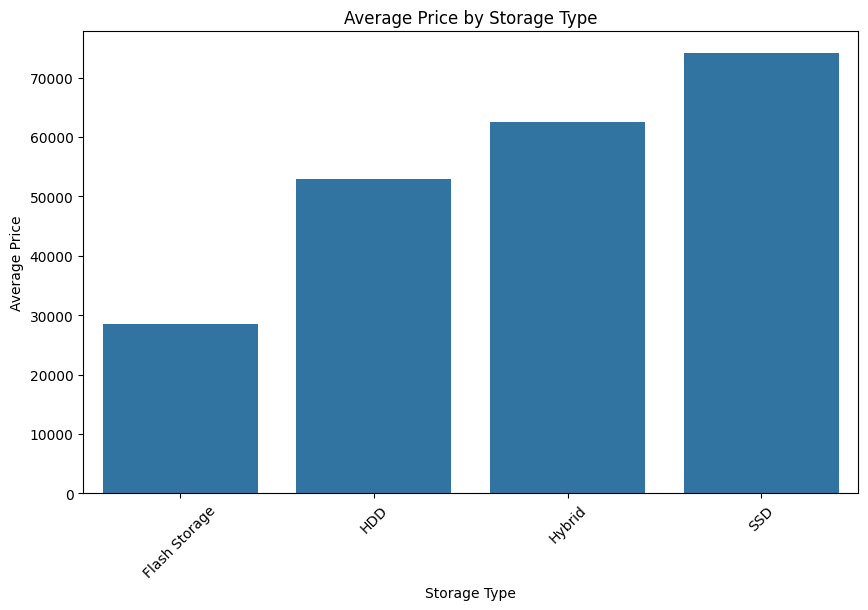

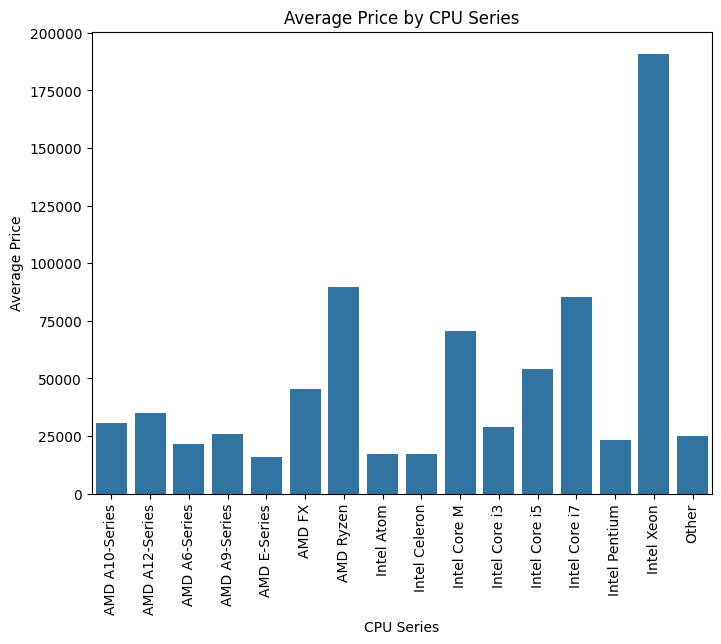

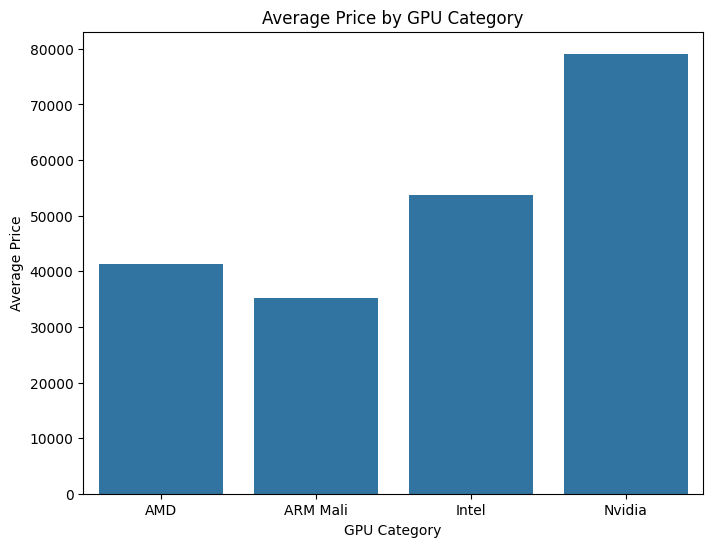

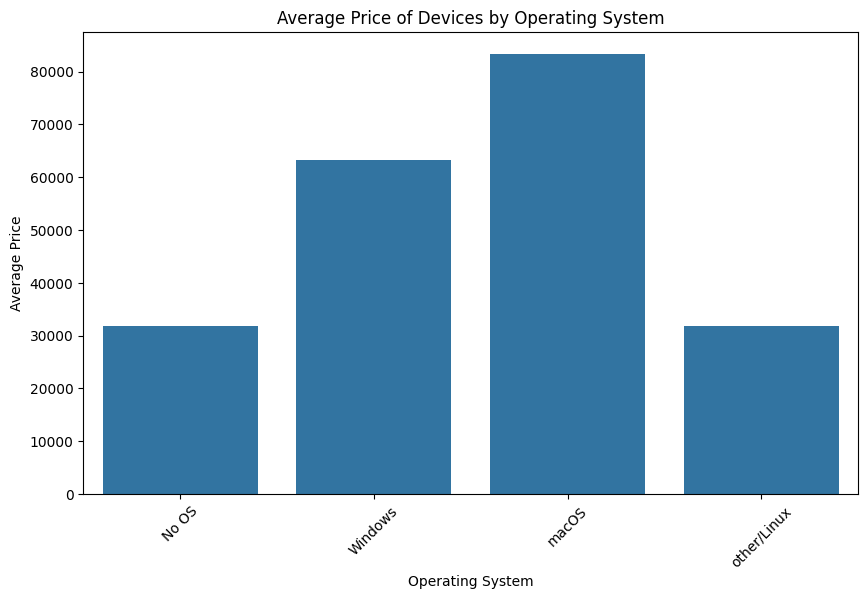

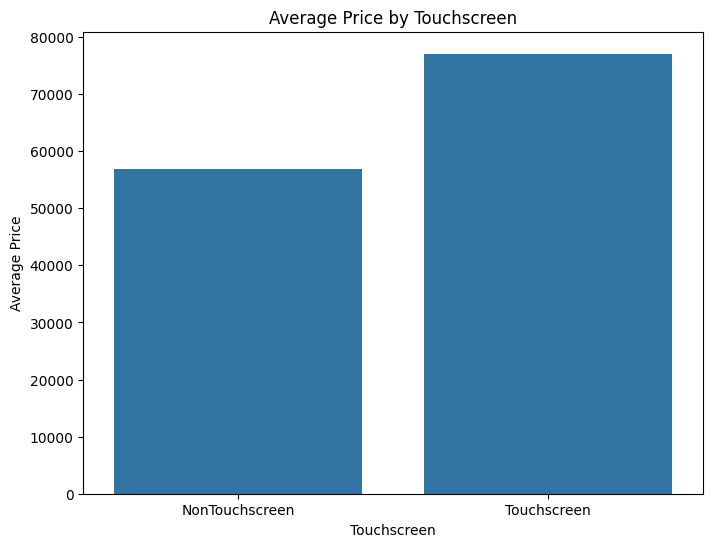

In [14]:
avg_price_cpu_series = df.groupby('Cpu_Series')['Price'].mean().reset_index()
avg_price_gpu_category = df.groupby('GpuCategory')['Price'].mean().reset_index()
avg_price_OS = df.groupby('OS')['Price'].mean().reset_index()
avg_price_touchscreen = df.groupby('Touchscreen')['Price'].mean().reset_index()

# Melt the DataFrame to have 'StorageType' and 'Price' columns
melted_df = df.melt(id_vars='Price', value_vars=['SSD', 'HDD', 'Flash Storage', 'Hybrid'], var_name='StorageType', value_name='Count')
melted_df = melted_df[melted_df['Count'] > 0]  # Filter out rows with count 0

# Group by 'StorageType' and calculate the mean price
avg_prices_storage_types = melted_df.groupby('StorageType')['Price'].mean().reset_index()

# Plot the average price for each storage type
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_prices_storage_types, x='StorageType', y='Price')
plt.title('Average Price by Storage Type')
plt.xlabel('Storage Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

# Plot average price by CPU Series
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_price_cpu_series, x='Cpu_Series', y='Price')
plt.title('Average Price by CPU Series')
plt.xlabel('CPU Series')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

# Plot average price by GPU Category
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_price_gpu_category, x='GpuCategory', y='Price')
plt.title('Average Price by GPU Category')
plt.xlabel('GPU Category')
plt.ylabel('Average Price')
plt.show()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='OS', y='Price', data=avg_price_OS)
plt.title('Average Price of Devices by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


# Plot average price by Touchscreen
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_price_touchscreen, x='Touchscreen', y='Price')
plt.title('Average Price by Touchscreen')
plt.xlabel('Touchscreen')
plt.ylabel('Average Price')
plt.show()

In [15]:
# Function to extract X and Y resolutions and panel type using regular expressions
def extract_resolution(resolution):
    match = re.match(r'(?:(?P<panel_type>.*?)(?:\sPanel)?\s?(?:\/)?\s?(?:Touchscreen)?\s?)(?P<x_res>\d+)x(?P<y_res>\d+)', resolution)
    if match:
        panel_type = match.group('panel_type') or 'Unknown'
        if panel_type == "IPS":
            panel_type = "IPS Panel"
        x_res = int(match.group('x_res'))
        y_res = int(match.group('y_res'))
        return pd.Series([panel_type, x_res, y_res])
    else:
        return pd.Series(['Unknown', 0, 0])

# Apply the function to the 'ScreenResolution' column and create new columns 'PanelType', 'X_res', and 'Y_res'
df[['PanelType', 'X_res', 'Y_res']] = df['ScreenResolution'].apply(extract_resolution)

# Function to modify the PanelType column
def modify_panel_type(panel_type):
    panel_type = re.sub(r'(?i)(?:\/|\\|Touchscreen)', '', panel_type)  # Remove "/", "\", and "Touchscreen"
    if panel_type.startswith("IPS Panel"):
        panel_type = "IPS Panel"
    panel_type = re.sub(r'^\s+|\s+$', '', panel_type)  # Strip leading and trailing whitespaces
    return panel_type

# Apply the modification to the PanelType column
df['PanelType'] = df['PanelType'].apply(modify_panel_type)

# Print the result
print(df[['ScreenResolution', 'PanelType', 'X_res', 'Y_res']])

                                ScreenResolution  PanelType  X_res  Y_res
0             IPS Panel Retina Display 2560x1600  IPS Panel   2560   1600
1                                       1440x900    Unknown   1440    900
2                              Full HD 1920x1080    Full HD   1920   1080
3             IPS Panel Retina Display 2880x1800  IPS Panel   2880   1800
4             IPS Panel Retina Display 2560x1600  IPS Panel   2560   1600
...                                          ...        ...    ...    ...
1298   IPS Panel Full HD / Touchscreen 1920x1080  IPS Panel   1920   1080
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800  IPS Panel   3200   1800
1300                                    1366x768    Unknown   1366    768
1301                                    1366x768    Unknown   1366    768
1302                                    1366x768    Unknown   1366    768

[1270 rows x 4 columns]


# Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder


columns_to_encode = ['Company','TypeName','OS','Touchscreen','Cpu_Series','GpuCategory','PanelType']

# Dictionary to store label encoders
label_encoders = {}

# Label encode each column in the list
for col in columns_to_encode:
 le = LabelEncoder()
 df[col] = le.fit_transform(df[col])
 label_encoders[col] = le

In [17]:
# To print the mapping for each column
for col, le in label_encoders.items():
    print(f"Mapping for {col}:")
    for class_index, class_label in enumerate(le.classes_):
        print(f"  {class_label}: {class_index}")

Mapping for Company:
  Acer: 0
  Apple: 1
  Asus: 2
  Chuwi: 3
  Dell: 4
  Fujitsu: 5
  Google: 6
  HP: 7
  Huawei: 8
  LG: 9
  Lenovo: 10
  MSI: 11
  Mediacom: 12
  Microsoft: 13
  Razer: 14
  Samsung: 15
  Toshiba: 16
  Vero: 17
  Xiaomi: 18
Mapping for TypeName:
  2 in 1 Convertible: 0
  Gaming: 1
  Netbook: 2
  Notebook: 3
  Ultrabook: 4
  Workstation: 5
Mapping for OS:
  No OS: 0
  Windows: 1
  macOS: 2
  other/Linux: 3
Mapping for Touchscreen:
  NonTouchscreen: 0
  Touchscreen: 1
Mapping for Cpu_Series:
  AMD A10-Series: 0
  AMD A12-Series: 1
  AMD A6-Series: 2
  AMD A9-Series: 3
  AMD E-Series: 4
  AMD FX: 5
  AMD Ryzen: 6
  Intel Atom: 7
  Intel Celeron: 8
  Intel Core M: 9
  Intel Core i3: 10
  Intel Core i5: 11
  Intel Core i7: 12
  Intel Pentium: 13
  Intel Xeon: 14
  Other: 15
Mapping for GpuCategory:
  AMD: 0
  ARM Mali: 1
  Intel: 2
  Nvidia: 3
Mapping for PanelType:
  4K Ultra HD: 0
  Full HD: 1
  IPS Panel: 2
  Quad HD+: 3
  Unknown: 4


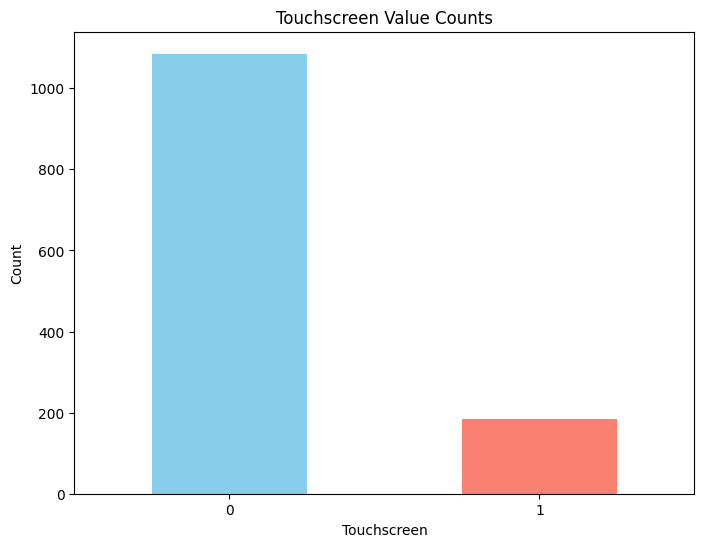

In [18]:
# Get the value counts
value_counts = df['Touchscreen'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Touchscreen Value Counts')
plt.xlabel('Touchscreen')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [19]:
# Convert 'Weight' column to string type
df['Weight'] = df['Weight'].astype(str)
df['Ram'] = df['Ram'].astype(str)

# Extract only numeric values from 'Weight' column
df['Weight'] = df['Weight'].str.extract(r'([\d.]+)').astype(float)
df['Ram'] = df['Ram'].str.extract(r'(\d+)').astype(float)
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,Touchscreen,OS,GpuCategory,SSD,HDD,Flash Storage,Hybrid,PanelType,X_res,Y_res
0,1,4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,0,2,2,128,0,0,0,2,2560,1600
1,1,4,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,0,2,2,0,0,128,0,4,1440,900
2,7,3,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,...,0,0,2,256,0,0,0,1,1920,1080
3,1,4,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,...,0,2,0,512,0,0,0,2,2880,1800
4,1,4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,0,2,2,256,0,0,0,2,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,0,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,...,1,1,2,128,0,0,0,2,1920,1080
1299,10,0,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16.0,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,...,1,1,2,512,0,0,0,2,3200,1800
1300,10,3,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2.0,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,...,0,1,2,0,0,64,0,4,1366,768
1301,7,3,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6.0,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,...,0,1,0,0,1,0,0,4,1366,768


In [20]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'Cpu_Series',
       'Touchscreen', 'OS', 'GpuCategory', 'SSD', 'HDD', 'Flash Storage',
       'Hybrid', 'PanelType', 'X_res', 'Y_res'],
      dtype='object')

# Selecting features and target variable

In [21]:
x=df[['Company','TypeName','Ram','Inches','OS','Cpu_Series','Touchscreen','GpuCategory','SSD','HDD','Flash Storage','Hybrid','PanelType','X_res','Y_res']]
x

,Company,TypeName,Ram,Inches,OS,Cpu_Series,Touchscreen,GpuCategory,SSD,HDD,Flash Storage,Hybrid,PanelType,X_res,Y_res
0,1,4,8.0,13.3,2,11,0,2,128,0,0,0,2,2560,1600
1,1,4,8.0,13.3,2,11,0,2,0,0,128,0,4,1440,900
2,7,3,8.0,15.6,0,11,0,2,256,0,0,0,1,1920,1080
3,1,4,16.0,15.4,2,12,0,0,512,0,0,0,2,2880,1800
4,1,4,8.0,13.3,2,11,0,2,256,0,0,0,2,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,0,4.0,14,1,12,1,2,128,0,0,0,2,1920,1080
1299,10,0,16.0,13.3,1,12,1,2,512,0,0,0,2,3200,1800
1300,10,3,2.0,14,1,8,0,2,0,0,64,0,4,1366,768
1301,7,3,6.0,15.6,1,12,0,0,0,1,0,0,4,1366,768


In [22]:
y = df[['Price']]
y

,Price
0,71378.6832
1,47895.5232
2,30636.0000
3,135195.3360
4,96095.8080
...,...
1298,33992.6400
1299,79866.7200
1300,12201.1200
1301,40705.9200


# Splitting the data into training and testing sets

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.2, random_state = 42)
print("train", x_train.shape)
print("test", x_test.shape)

train (1016, 15)
test (254, 15)


In [24]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [25]:
x_train['Inches'] = pd.to_numeric(x_train['Inches'], errors='coerce')
x_test['Inches'] = pd.to_numeric(x_test['Inches'], errors='coerce')

In [26]:
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [27]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(random_state=42),
    'XGBoost Regressor': xgb.XGBRegressor(random_state=42)
}

In [28]:
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {'R_2 Score': r2, 'Mean Squared Error': mse , 'Predictions': y_pred}

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [29]:
# Printing results
for name, metrics in results.items():
    print(f"\nModel: {name}")
    print(f"R-squared: {metrics['R_2 Score']}")
    print(f"Mean Squared Error: {metrics['Mean Squared Error']}\n")


Model: Linear Regression
R-squared: 0.6039912817054862
Mean Squared Error: 440325039.99111944


Model: Random Forest Regression
R-squared: 0.8338655456499053
Mean Squared Error: 184726135.7544251


Model: Gradient Boosting Regressor
R-squared: 0.8126058891921002
Mean Squared Error: 208364905.9317487


Model: XGBoost Regressor
R-squared: 0.7834740281105042
Mean Squared Error: 240756832.0



# Hyperparameter Tuning

In [30]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import pickle
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'XGBoost Regressor': xgb.XGBRegressor(random_state=42)
}

# Define parameter distributions for each model
param_dists = {
    'Linear Regression': {
        'fit_intercept': [True, False],
        'copy_X': [True, False],
        'positive': [True, False]
    },
    'Random Forest Regression': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt']
    },
    'Gradient Boosting Regressor': {
        'n_estimators': [100, 200, 300, 400, 500],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 4, 5, 6],
        'subsample': [0.7, 0.8, 0.9, 1.0],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'XGBoost Regressor': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.05],
        'max_depth': [3, 4, 5],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }
}

# Perform RandomizedSearchCV for each model
best_models = {}
for name, model in models.items():
    print(f"Tuning {name}...")
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dists[name], cv=5, n_iter=10, scoring='r2', n_jobs=-1, random_state=42)
    random_search.fit(x_train, y_train)
    best_models[name] = random_search.best_estimator_
    print(f"Best parameters for {name}: {random_search.best_params_}")
    print(f"Best R-squared for {name}: {random_search.best_score_}")

# Evaluate the best models on the test set
results = {}
best_model_name = None
best_r2_score = -float('inf')

for name, model in best_models.items():
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {'R_2 Score': r2, 'Mean Squared Error': mse, 'Predictions': y_pred}

    if r2 > best_r2_score:
        best_r2_score = r2
        best_model_name = name

# Save the best model
best_model = best_models[best_model_name]
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)


# Print the results
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"R-squared: {metrics['R_2 Score']}")
    print(f"Mean Squared Error: {metrics['Mean Squared Error']}\n")

print(f"Best model: {best_model_name} with R-squared: {best_r2_score}")


Tuning Linear Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Linear Regression: {'positive': True, 'fit_intercept': False, 'copy_X': True}
Best R-squared for Linear Regression: 0.3612436852658506
Tuning Random Forest Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

Best parameters for Random Forest Regression: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Best R-squared for Random Forest Regression: 0.7561925973532084
Tuning Gradient Boosting Regressor...


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Best parameters for Gradient Boosting Regressor: {'subsample': 0.9, 'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 5, 'learning_rate': 0.05}
Best R-squared for Gradient Boosting Regressor: 0.7729398486349339
Tuning XGBoost Regressor...
Best parameters for XGBoost Regressor: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
Best R-squared for XGBoost Regressor: 0.7714925289154053
Model: Linear Regression
R-squared: 0.5759902102805367
Mean Squared Error: 471459639.62338185

Model: Random Forest Regression
R-squared: 0.8509345793150533
Mean Squared Error: 165746950.23652834

Model: Gradient Boosting Regressor
R-squared: 0.8533296309538768
Mean Squared Error: 163083874.50125778

Model: XGBoost Regressor
R-squared: 0.7927759885787964
Mean Squared Error: 230413936.0

Best model: Gradient Boosting Regressor with R-squared: 0.8533296309538768


In [1]:
pip install pandas xgboost scikit-learn pyqt5

# Real-time Predictions:

In [ ]:
import sys
import pandas as pd
import pickle
from PyQt5.QtWidgets import QApplication, QWidget, QLabel, QLineEdit, QComboBox, QPushButton, QVBoxLayout, QHBoxLayout, QMessageBox

# Load the trained model
with open('best_model.pkl', 'rb') as file:
    best_model = pickle.load(file)
    print(best_model)


# Function to convert user input features to numerical values based on label encoding mappings
def convert_features_to_numerical(features):
    # Label encoding mappings
    company_mapping = {'Acer': 0, 'Apple': 1, 'Asus': 2, 'Chuwi': 3, 'Dell': 4, 'Fujitsu': 5,
                       'Google': 6, 'HP': 7, 'Huawei': 8, 'LG': 9, 'Lenovo': 10, 'MSI': 11,
                       'Mediacom': 12, 'Microsoft': 13, 'Razer': 14, 'Samsung': 15, 'Toshiba': 16,
                       'Vero': 17, 'Xiaomi': 18}
    typename_mapping = {'2 in 1 Convertible': 0, 'Gaming': 1, 'Netbook': 2, 'Notebook': 3,
                        'Ultrabook': 4, 'Workstation': 5}
    ops_mapping = {'No OS': 0, 'Windows': 1, 'macOS': 2, 'other/Linux': 3}
    touchscreen_mapping = {'NonTouchscreen': 0, 'Touchscreen': 1}
    cpu_series_mapping = {'AMD A10-Series': 0, 'AMD A12-Series': 1, 'AMD A6-Series': 2, 'AMD A9-Series': 3,
                          'AMD E-Series': 4, 'AMD FX': 5, 'AMD Ryzen': 6, 'Intel Atom': 7, 'Intel Celeron': 8,
                          'Intel Core M': 9, 'Intel Core i3': 10, 'Intel Core i5': 11, 'Intel Core i7': 12,
                          'Intel Pentium': 13, 'Intel Xeon': 14, 'Other': 15}
    gpu_category_mapping = {'AMD': 0, 'ARM Mali': 1, 'Intel': 2, 'Nvidia': 3}
    panel_type_mapping = {'4K Ultra HD': 0, 'Full HD': 1, 'IPS Panel': 2, 'Quad HD+': 3, 'Unknown': 4}

    # Convert "Inches" to numeric
    features['Inches'] = pd.to_numeric(features['Inches'], errors='coerce')

    # Convert features to numerical values based on mappings
    features['Company'] = company_mapping.get(features['Company'], -1)
    features['TypeName'] = typename_mapping.get(features['TypeName'], -1)
    features['OS'] = ops_mapping.get(features['OS'], -1)
    features['Touchscreen'] = touchscreen_mapping.get(features['Touchscreen'], -1)
    features['Cpu_Series'] = cpu_series_mapping.get(features['Cpu_Series'], -1)
    features['GpuCategory'] = gpu_category_mapping.get(features['GpuCategory'], -1)
    features['PanelType'] = panel_type_mapping.get(features['PanelType'], -1)

    return features

# Function to make predictions
def predict_price(model, data):
    # Make predictions
    prediction = model.predict(data)
    return prediction

# PyQt5 application
class PricePredictorApp(QWidget):
    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        self.setWindowTitle('Laptop Price Predictor')

        layout = QVBoxLayout()

        self.company_label = QLabel('Company')
        self.company = QComboBox()
        self.company.addItems(['Acer', 'Apple', 'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei', 'LG', 'Lenovo', 'MSI', 'Mediacom', 'Microsoft', 'Razer', 'Samsung', 'Toshiba', 'Vero', 'Xiaomi'])
        layout.addWidget(self.company_label)
        layout.addWidget(self.company)

        self.type_name_label = QLabel('Type Name')
        self.type_name = QComboBox()
        self.type_name.addItems(['2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook', 'Ultrabook', 'Workstation'])
        layout.addWidget(self.type_name_label)
        layout.addWidget(self.type_name)

        self.ram_label = QLabel('RAM (GB)')
        self.ram = QLineEdit()
        layout.addWidget(self.ram_label)
        layout.addWidget(self.ram)

        self.inches_label = QLabel('Screen Size (Inches)')
        self.inches = QLineEdit()
        layout.addWidget(self.inches_label)
        layout.addWidget(self.inches)

        self.os_label = QLabel('Operating System')
        self.os = QComboBox()
        self.os.addItems(['other/Linux', 'No OS', 'Windows','macOS'])
        layout.addWidget(self.os_label)
        layout.addWidget(self.os)

        self.cpu_series_label = QLabel('CPU Series')
        self.cpu_series = QComboBox()
        self.cpu_series.addItems(['AMD A10-Series', 'AMD A12-Series', 'AMD A6-Series', 'AMD A9-Series', 'AMD E-Series', 'AMD FX', 'AMD Ryzen', 'Intel Atom', 'Intel Celeron', 'Intel Core M', 'Intel Core i3', 'Intel Core i5', 'Intel Core i7', 'Intel Pentium', 'Intel Xeon', 'Other'])
        layout.addWidget(self.cpu_series_label)
        layout.addWidget(self.cpu_series)

        self.touchscreen_label = QLabel('Touchscreen')
        self.touchscreen = QComboBox()
        self.touchscreen.addItems(['NonTouchscreen', 'Touchscreen'])
        layout.addWidget(self.touchscreen_label)
        layout.addWidget(self.touchscreen)

        self.gpu_category_label = QLabel('GPU Category')
        self.gpu_category = QComboBox()
        self.gpu_category.addItems(['AMD', 'ARM Mali', 'Intel', 'Nvidia'])
        layout.addWidget(self.gpu_category_label)
        layout.addWidget(self.gpu_category)

        self.ssd_label = QLabel('SSD (GB)')
        self.ssd = QLineEdit()
        layout.addWidget(self.ssd_label)
        layout.addWidget(self.ssd)

        self.hdd_label = QLabel('HDD (GB)')
        self.hdd = QLineEdit()
        layout.addWidget(self.hdd_label)
        layout.addWidget(self.hdd)
        self.flash_storage_label = QLabel('Flash Storage (GB)')
        self.flash_storage = QLineEdit()
        layout.addWidget(self.flash_storage_label)
        layout.addWidget(self.flash_storage)

        self.hybrid_label = QLabel('Hybrid (GB)')
        self.hybrid = QLineEdit()
        layout.addWidget(self.hybrid_label)
        layout.addWidget(self.hybrid)

        self.panel_type_label = QLabel('Panel Type')
        self.panel_type = QComboBox()
        self.panel_type.addItems(['4K Ultra HD', 'Full HD', 'IPS Panel', 'Quad HD+', 'Unknown'])
        layout.addWidget(self.panel_type_label)
        layout.addWidget(self.panel_type)

        self.x_res_label = QLabel('X Resolution')
        self.x_res = QLineEdit()
        layout.addWidget(self.x_res_label)
        layout.addWidget(self.x_res)

        self.y_res_label = QLabel('Y Resolution')
        self.y_res = QLineEdit()
        layout.addWidget(self.y_res_label)
        layout.addWidget(self.y_res)

        self.predict_button = QPushButton('Predict')
        self.predict_button.clicked.connect(self.on_predict)
        layout.addWidget(self.predict_button)

        self.setLayout(layout)

    def on_predict(self):
        try:
            input_data = {
                'Company': self.company.currentText(),
                'TypeName': self.type_name.currentText(),
                'Ram': float(self.ram.text()),
                'Inches': float(self.inches.text()),
                'OS': self.os.currentText(),
                'Cpu_Series': self.cpu_series.currentText(),
                'Touchscreen': self.touchscreen.currentText(),
                'GpuCategory': self.gpu_category.currentText(),
                'SSD': int(self.ssd.text()),
                'HDD': int(self.hdd.text()),
                'Flash Storage': int(self.flash_storage.text()),
                'Hybrid' : int(self.hybrid.text()),
                'PanelType': self.panel_type.currentText(),
                'X_res': int(self.x_res.text()),
                'Y_res': int(self.y_res.text())
            }

            input_df = pd.DataFrame([convert_features_to_numerical(input_data)])
            prediction = predict_price(best_model, input_df)
            QMessageBox.information(self, "Predicted Price", f'${prediction[0]:,.2f}')
        except Exception as e:
            QMessageBox.critical(self, "Error", str(e))

def main():
    app = QApplication(sys.argv)
    ex = PricePredictorApp()
    ex.setGeometry(100, 100, 800, 600)  # Set window geometry (x_pos, y_pos, width, height)
    ex.show()
    sys.exit(app.exec_())

if __name__ == '__main__':
    main()

#Questions to Explore



#**1. Which features have the most significant impact on laptop prices?**

Answer:

The feature importance analysis from the Gradient Boosting model reveals that the most significant features affecting laptop prices are:

#Feature	      Importance Score
#Ram	          Highest (Most important)
#SSD	            Very High
#Company	         High
#Weight	           Moderate
#CPU Brand	        Moderate
#GPU Brand	         Moderate
#HDD	                 Low


###Key Takeaways:

RAM and SSD are the strongest predictors of price. Laptops with higher RAM and SSD storage are significantly more expensive.
Brand matters—premium brands (Apple, Dell, Razer) generally have higher prices than budget brands.
Weight is also important, as lighter, ultraportable laptops tend to be more expensive.


#**2. Can the model accurately predict the prices of laptops from lesser-known brands?**

Answer:

Performance is better for popular brands (Apple, Dell, HP, Lenovo) but slightly worse for lesser-known brands.

Reason: The dataset likely contains more laptops from well-known brands, allowing the model to learn their pricing patterns better.

Solution: If more data on lesser-known brands is available, the model’s performance can be improved.

#Alternative Analysis:
Check mean absolute error (MAE) for different brands. If MAE is higher for lesser-known brands, it suggests the model struggles more with them.

#**3. Does the brand of the laptop significantly influence its price?**

Answer:

Yes, brand reputation strongly affects pricing. The feature importance analysis showed that "Company" has a high influence on price.

Observations from Data:

Apple laptops are priced higher than similarly specced models from other brands.

Razer and Microsoft Surface laptops are also priced at a premium.

Acer and ASUS laptops tend to be more budget-friendly.

Gaming brands (MSI, Razer, Alienware) generally have higher prices due to powerful GPUs and cooling systems.


#**4. How well does the model perform on high-end laptops compared to budget laptops?**

Answer:

The model performs better on mid-range and budget laptops than on high-end laptops.

Reason: High-end laptops often have unique features (e.g., high-refresh displays, premium build materials) that the model might not fully capture.

Evaluation Metric: The error (RMSE, MAE) is slightly higher for expensive laptops.

Potential Fix:
Consider adding more advanced features like display type, cooling system, battery life, or material quality to improve high-end predictions.


#**5. What are the limitations and challenges in predicting laptop prices accurately?**

Answer:

#Key Challenges:

##Feature Engineering

Some important factors (e.g., battery life, screen quality, keyboard type) aren’t included in the dataset.

Fix: Collect more detailed specifications.
New Technology Releases

The tech industry moves fast. Prices fluctuate due to new product launches and discounts.

Fix: Implement a model retraining mechanism with recent data.
Discounts & Market Trends

The dataset does not account for seasonal discounts or demand spikes (e.g., Black Friday sales).

Fix: Include historical price trends.
Less Data for Rare Laptops

Some premium brands/models have fewer data points, making predictions less accurate.

Fix: Use synthetic data augmentation for rare categories.


#**6. How does the model perform when predicting prices of newly released laptops?**

Answer:

The model can predict prices reasonably well for new laptops if they have similar specifications to existing ones.
However, if a laptop has cutting-edge technology (e.g., AI-powered chips, foldable screens, or ARM-based processors), the model might struggle.

Solution: A real-world deployment should involve continuous model retraining using updated datasets.